# **Neural Network - A simple perceptron**

###**Q1. What is Deep Learning? Briefly describe how it evolved and how it differs from traditional machine learning.**

Deep Learning is a specialized branch of Machine Learning that focuses on artificial neural networks with many hidden layers capable of learning hierarchical representations from raw data. It can automatically discover complex features from large datasets without manual feature engineering. The evolution of Deep Learning began with early neural network concepts in the 1950s, followed by the introduction of the perceptron model. However, due to limited computing power and data, progress was slow. The revival happened in the 2000s with the availability of large datasets, GPUs, and algorithms like backpropagation, which enabled training of deep networks efficiently. Unlike traditional Machine Learning, which relies heavily on manually designed features, Deep Learning models learn directly from data, leading to better performance on tasks involving images, speech, and text.

###**Q2. Explain the basic architecture and functioning of a Perceptron. What are its limitations?**

A Perceptron is the simplest form of an artificial neuron and forms the foundation of neural networks. It consists of input nodes, each associated with a weight, a bias term, and an activation function that determines the output. The perceptron calculates a weighted sum of inputs, adds the bias, and applies the activation function to produce an output. The perceptron learns by adjusting weights during training to minimize prediction error. Despite being powerful in concept, it has limitations — it can only handle linearly separable problems and fails with complex, non-linear data patterns such as XOR. It also cannot generalize well for large datasets or complex relationships, which led to the development of multilayer perceptrons.

###**Q3. Describe the purpose of activation function in neural networks. Compare Sigmoid, ReLU, and Tanh functions.**

Activation functions introduce non-linearity into neural networks, allowing them to learn complex and non-linear mappings from inputs to outputs. Without activation functions, a neural network would behave like a linear regression model regardless of the number of layers. The Sigmoid function outputs values between 0 and 1, making it useful for binary classification, but it suffers from vanishing gradients when the input is large. The ReLU (Rectified Linear Unit) function outputs the input directly if it is positive and zero otherwise, helping networks train faster and reducing computational cost, though it may lead to “dead neurons.” The Tanh function is similar to Sigmoid but outputs between -1 and 1, which helps center the data around zero, improving convergence. In practice, ReLU is widely used in hidden layers, while Sigmoid and Tanh are preferred for output layers depending on the problem.

###**Q4. What is the difference between Loss function and Cost function in neural networks? Provide examples.**

The Loss function measures the error between the predicted and actual value for a single training example, while the Cost function represents the average loss across the entire training dataset. The purpose of these functions is to guide the optimization process by quantifying how well or poorly the model performs. For example, in regression problems, Mean Squared Error (MSE) is a common loss function, while in classification tasks, Binary Cross-Entropy or Categorical Cross-Entropy are often used. The model tries to minimize the cost function during training through iterative updates to weights using optimization algorithms such as Gradient Descent.

###**Q5. What is the role of optimizers in neural networks? Compare Gradient Descent, Adam, and RMSprop.**

Optimizers are algorithms used to adjust the weights of a neural network in order to minimize the cost function. Gradient Descent updates weights by moving them in the opposite direction of the gradient of the loss function. Although simple, it can be slow and sensitive to learning rate choice. Adam (Adaptive Moment Estimation) combines the advantages of two other methods, Momentum and RMSprop, by adapting learning rates for each parameter and maintaining moving averages of gradients, leading to faster and more stable convergence. RMSprop, on the other hand, adjusts the learning rate based on the recent magnitudes of gradients, which helps handle non-stationary data. Among these, Adam is the most popular for deep learning due to its robustness and efficiency.

###**Q6. Write a Python program to implement a single-layer perceptron from scratch using NumPy to solve the logical AND gate.**



In [ ]:
import numpy as np

# Define input and output for AND gate
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])

# Initialize weights and bias
weights = np.random.rand(2)
bias = np.random.rand(1)
lr = 0.1  # learning rate

# Activation function (step function)
def step(x):
    return np.where(x >= 0.5, 1, 0)

# Training the perceptron
for epoch in range(20):
    for i in range(len(X)):
        z = np.dot(X[i], weights) + bias
        y_pred = step(z)
        error = y[i] - y_pred
        weights += lr * error * X[i]
        bias += lr * error

print("Trained weights:", weights)
print("Trained bias:", bias)

# Testing the model
for i in range(len(X)):
    z = np.dot(X[i], weights) + bias
    print(f"Input: {X[i]} -> Output: {step(z)}")


Trained weights: [0.14064691 0.55598058]
Trained bias: [-0.18407261]
Input: [0 0] -> Output: [0]
Input: [0 1] -> Output: [0]
Input: [1 0] -> Output: [0]
Input: [1 1] -> Output: [1]


###**Q7.  Implement and visualize Sigmoid, ReLU, and Tanh activation functions using Matplotlib.**

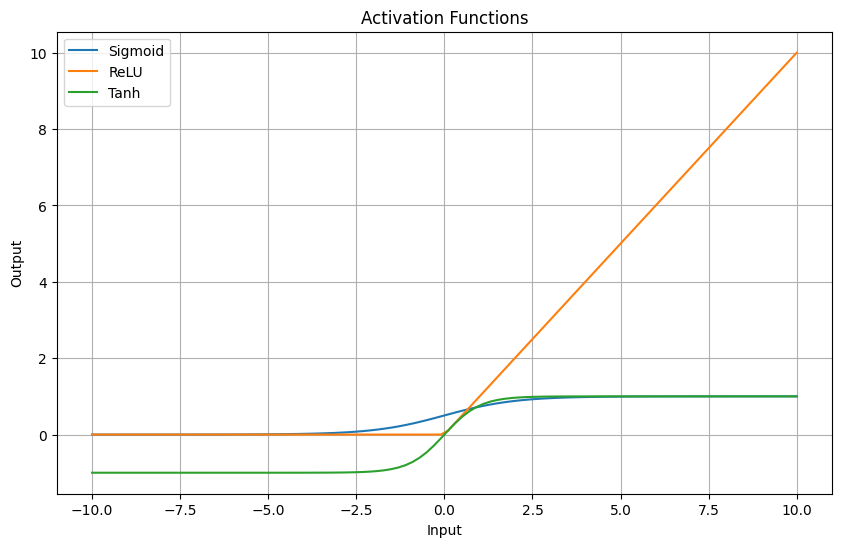

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)

# Define activation functions
sigmoid = 1 / (1 + np.exp(-x))
relu = np.maximum(0, x)
tanh = np.tanh(x)

# Plot
plt.figure(figsize=(10,6))
plt.plot(x, sigmoid, label='Sigmoid')
plt.plot(x, relu, label='ReLU')
plt.plot(x, tanh, label='Tanh')
plt.title("Activation Functions")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.show()


###**Q8.  Use Keras to build and train a simple multilayer neural network on the MNIST digits dataset. Print the training accuracy.**

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build model
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

# Print training accuracy
print("Training accuracy:", history.history['accuracy'][-1])


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8274 - loss: 0.6369 - val_accuracy: 0.9543 - val_loss: 0.1700
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9456 - loss: 0.1905 - val_accuracy: 0.9682 - val_loss: 0.1238
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9628 - loss: 0.1313 - val_accuracy: 0.9710 - val_loss: 0.1066
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9718 - loss: 0.0984 - val_accuracy: 0.9733 - val_loss: 0.0898
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9785 - loss: 0.0775 - val_accuracy: 0.9747 - val_loss: 0.0908
Training accuracy: 0.9777222275733948


###**Q9. Visualize the loss and accuracy curves for a neural network model trained on the Fashion MNIST dataset. Interpret the training behavior.**

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7353 - loss: 0.7743 - val_accuracy: 0.8510 - val_loss: 0.4323
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8518 - loss: 0.4219 - val_accuracy: 0.8600 - val_loss: 0.3866
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8643 - loss: 0.3848 - val_accuracy: 0.8637 - val_loss: 0.3748
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8757 - loss: 0.3471 - val_accuracy: 0.8750 - val_loss: 0.3465
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8814 - loss: 0.3258 - val_accuracy: 0.8763 - val_loss: 0.3437
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8875 - loss: 0.3118 - val_accuracy: 0.8772 - val_loss: 0.3382
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 

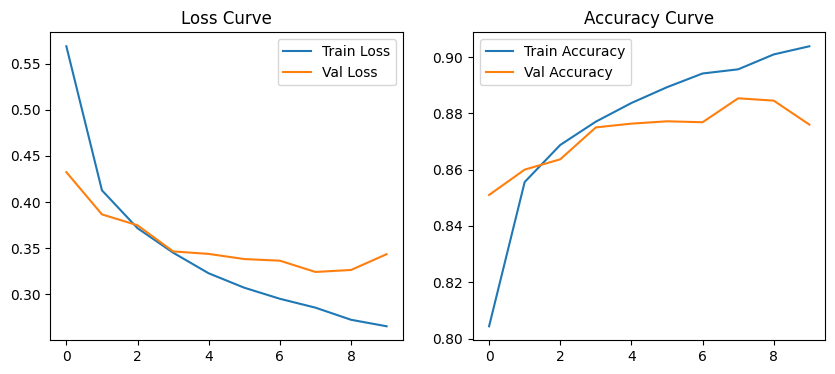

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

# Plot training behavior
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss Curve")

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Curve")

plt.show()


###**Q10.  You are working on a project for a bank that wants to automatically detect fraudulent transactions. The dataset is large, imbalanced, and contains structured features like transaction amount, merchant ID, and customer location. The goal is to classify each transaction as fraudulent or legitimate.**
###**Explain your real-time data science workflow:**
###**● How would you design a deep learning model (perceptron or multilayer NN)?**
###**● Which activation function and loss function would you use, and why?**
###**● How would you train and evaluate the model, considering class imbalance?**
###**● Which optimizer would be suitable, and how would you prevent overfitting?**

Class Weights: {0: np.float64(0.5252100840336135), 1: np.float64(10.416666666666666)}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.4270 - loss: 0.7281 - val_accuracy: 0.4487 - val_loss: 0.7093
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4828 - loss: 0.6924 - val_accuracy: 0.5562 - val_loss: 0.6827
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5356 - loss: 0.6836 - val_accuracy: 0.3363 - val_loss: 0.7338
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4143 - loss: 0.7114 - val_accuracy: 0.4475 - val_loss: 0.7084
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4949 - loss: 0.6680 - val_accuracy: 0.4888 - val_loss: 0.6994
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5041 - loss: 0.6843 - val_accuracy: 0.4988 - val_loss: 0.6982
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4836 - loss: 0.6977 - val_accuracy: 0.5250 - val_loss: 0.6937
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5525 - loss: 0.6745 - val_accuracy: 0.5675 - val

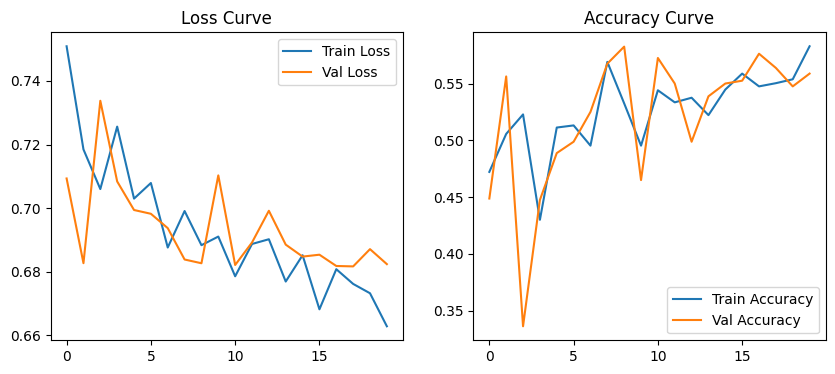

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight

# ----- Simulating a dataset  -----
np.random.seed(42)
n_samples = 5000
X = np.random.rand(n_samples, 10)  # 10 structured features
y = np.random.choice([0, 1], size=n_samples, p=[0.95, 0.05])  # imbalanced classes

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compute class weights to handle imbalance
weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = {i: weights[i] for i in range(len(weights))}
print("Class Weights:", class_weights)

# ----- Build the model -----
model = Sequential([
    Dense(64, activation='relu', input_dim=10),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model with class weighting
history = model.fit(X_train, y_train, epochs=20, batch_size=64,
                    validation_split=0.2, class_weight=class_weights, verbose=1)

# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

# Plot training curves
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title("Loss Curve")

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend(); plt.title("Accuracy Curve")
plt.show()
